In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from math import sqrt


combined = pd.read_csv("CombineDdata.csv")


In [2]:
#X = combined.drop("Income in EUR",1)   #Feature Matrix
y = combined[["Instance","Income in EUR"]]

X = combined[["Instance","Year of Record","Age","Profession","Gender","Country"]].copy()

In [3]:
year_average = X["Year of Record"].dropna().mean(axis=0)
age_average = X["Age"].dropna().mean(axis=0)
#city_average = X["Size of City"].dropna().mean(axis=0)

X["Year of Record"].replace(np.nan, year_average, inplace=True)
X["Age"].replace(np.nan, age_average, inplace=True)
#X["Size of City"].replace(np.nan, city_average, inplace=True)


#print(X["Year of Record"].unique())
#print(X["Age"].unique())


scaler = MinMaxScaler()

X[["Year of Record","Age" ]] = scaler.fit_transform(X[["Year of Record","Age"]])
#print(df[["Year of Record","Age"]])







In [4]:
X["Profession"].replace(np.nan, "Unknown", inplace=True)
profs = X["Profession"]
label_encoder_profs = LabelEncoder()
integer_encoded = label_encoder_profs.fit_transform(profs)

#binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

profs_onehot = pd.DataFrame(onehot_encoded)
X = X.drop("Profession",1)   #Feature Matrix
X = pd.concat([X, profs_onehot], axis=1)


c:\users\chris\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [5]:
X["Gender"].replace(np.nan, "nan", inplace=True)
genders = X["Gender"]
label_encoder_genders = LabelEncoder()
integer_encoded = label_encoder_genders.fit_transform(genders)

#binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

genders_onehot = pd.DataFrame(onehot_encoded)
X = X.drop("Gender",1)   #Feature Matrix
X = pd.concat([X, genders_onehot], axis=1)


c:\users\chris\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [6]:
X["Country"].replace(np.nan, "Unknown", inplace=True)
Country = X["Country"]
label_encoder_Country = LabelEncoder()
integer_encoded = label_encoder_Country.fit_transform(Country)

#binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

Country_onehot = pd.DataFrame(onehot_encoded)
X = X.drop("Country",1)   #Feature Matrix
X = pd.concat([X, Country_onehot], axis=1)


c:\users\chris\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
c:\users\chris\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [7]:
df2_X = X.loc[X["Instance"] > 111993]
X = X.loc[X["Instance"] <= 111993]


          
#df2_y = y.loc[y["Instance"] > 111993] #not needed
y = y.loc[y["Instance"] <= 111993]

df2_X = df2_X.drop("Instance",1)
X = X.drop("Instance",1)

y = y.drop("Instance",1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Create linear regression object
regr = RidgeCV(alphas=np.array([0.0001,0.001,0.01,0.1,1]),fit_intercept=True)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

In [11]:

print("Root Mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, y_pred)))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Root Mean squared error: 82017.02
Variance score: 0.69


In [10]:
df2_y_pred = regr.predict(df2_X)


In [12]:
pd.DataFrame(df2_y_pred).to_csv("Results2.csv")

ValueError: x and y must be the same size

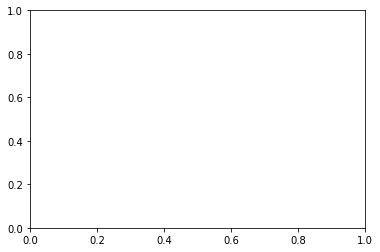

In [14]:
plt.scatter(X_test["Year of Record"], y_test,  color='black')
plt.plot(X_test["Year of Record"], y_pred, color='blue', linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()

